# IST340 - Final Project: Evaluating Risk Factors of Student Loan Borrowers

## Import Essential Libraries

In [128]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np

import math

import matplotlib.pyplot as plt 

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## Define File Path

In [129]:
file_path = './data/'

## Reading Excel Files into DataFrame

In [130]:
family_income = pd.read_excel(file_path + "Family_Income.xlsx")
family_income.head()

,STUDENT_ID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


In [131]:
credit_rating = pd.read_excel(file_path + "CreditRating Data 2012.xlsx")
credit_rating.head()

,STUDENT_ID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


In [132]:
hs_academics = pd.read_excel(file_path + "HS_Academics 2012.xlsx")
hs_academics.head()

,STUDENT_ID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


In [133]:
loan_amount = pd.read_excel(file_path + "LoanAmount.xlsx")
loan_amount.head()

,STUDENT_ID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


In [134]:
parents_education = pd.read_excel(file_path + "Parents_Education.xlsx")
parents_education.head()

,STUDENT_ID,PARENTS_EDUCATION_LEVEL
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


In [135]:
personality_characteristics = pd.read_excel(file_path + "Personality Characteristics Data.xlsx")
personality_characteristics.head()

,STUDENT_ID,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


In [136]:
region__marital_status = pd.read_excel(file_path + "Region, Marital Status.xlsx")
region__marital_status.head()

,STUDENT_ID,Country,Region,Married
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


## Parsing Prolog-Style .pl Files into DataFrame

### enlist.pl

In [137]:
# Read the enlist.pl file line by line
with open(file_path + "enlist.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

% enlist(student,Service).

% student is enlisted in Service.



enlist(student40,fire_department).

enlist(student51,fire_department).



In [138]:
# Extract student number and service
data = []
for line in lines: # for each row
    match = re.match(r'enlist\(student(\d+),(\w+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        service = match.group(2)             # the text after the comma
        data.append((student_number, service))


# Convert to DataFrame
enlist = pd.DataFrame(data, columns=['STUDENT_ID', 'Service'])
enlist.head()

,STUDENT_ID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


### disabled.pl

In [139]:
# Read the disabled.pl file line by line
with open(file_path + "disabled.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

disabled(student992).

disabled(student976).

disabled(student963).

disabled(student918).

disabled(student913).



In [140]:
# Extract student number and disabled status
data = []
for line in lines: # for each row
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        disabled_status = bool(match.group(0))
        data.append((student_number, disabled_status))


# Convert to DataFrame
disabled_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Disabled'])
disabled_df.head()

,STUDENT_ID,Disabled
0,992,True
1,976,True
2,963,True
3,918,True
4,913,True


### enrolled.pl

In [141]:
# Read the enrolled.pl file line by line
with open(file_path + "enrolled.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

% enrolled(Student,School,Units).

% Student is enrolled for Units at School



enrolled(student10,ucb,2).

enrolled(student18,ucsd,4).



In [142]:
# Extract student number and enrolled status
data = []
for line in lines: # for each row
    match = re.match(r'enrolled\(student(\d+),(\w+),(\w+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        school = match.group(2)
        course_units = match.group(3)
        data.append((student_number, school, course_units))


# Convert to DataFrame
enrolled_df = pd.DataFrame(data, columns=['STUDENT_ID', 'School', 'Course Units'])
enrolled_df.head()

,STUDENT_ID,School,Course Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


### filed_for_bankruptcy.pl

In [143]:
# Read the filed_for_bankruptcy.pl file line by line
with open(file_path + "filed_for_bankruptcy.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

filed_for_bankrupcy(student999).

filed_for_bankrupcy(student998).

filed_for_bankrupcy(student958).

filed_for_bankrupcy(student956).

filed_for_bankrupcy(student953).



In [144]:
# Extract student number and bankruptcy status
data = []
for line in lines: # for each row
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        bankruptcy_status = bool(match.group(0))
        data.append((student_number, bankruptcy_status))


# Convert to DataFrame
bankruptcy_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Filed_for_Bankruptcy'])
bankruptcy_df.head()

,STUDENT_ID,Filed_for_Bankruptcy
0,999,True
1,998,True
2,958,True
3,956,True
4,953,True


### male.pl

In [145]:
# Read the male.pl file line by line
with open(file_path + "male.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

male(student997).

male(student994).

male(student992).

male(student987).

male(student986).



In [146]:
# Extract student number and male status
data = []
for line in lines: # for each row
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        male_status = bool(match.group(0))
        data.append((student_number, male_status))


# Convert to DataFrame
male_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Male'])
male_df.head()

,STUDENT_ID,Male
0,997,True
1,994,True
2,992,True
3,987,True
4,986,True


### unemployed.pl

In [147]:
# Read the unemployed.pl file line by line
with open(file_path + "unemployed.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

unemployed(student1000).

unemployed(student996).

unemployed(student993).

unemployed(student948).

unemployed(student946).



In [148]:
# Extract student number and unemployed status
data = []
for line in lines: # for each row
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        unemployed_status = bool(match.group(0))
        data.append((student_number, unemployed_status))


# Convert to DataFrame
unemployed_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Unemployed'])
unemployed_df.head()

,STUDENT_ID,Unemployed
0,1000,True
1,996,True
2,993,True
3,948,True
4,946,True


### Parsing of Similarly Formatted Files

In [149]:
# Creation of a Reusable Parsing Function
def parse_prolog_file(file_name):
    """
    Parses a .pl Prolog-like file and returns a DataFrame with:
    - Function (e.g., 'enlist', 'no_payment_due')
    - StudentNumber (e.g., 1000)
    - Label (e.g., 'fire_department', 'pos', 'neg')
    """
    pattern = r'(\w+)\(student(\d+),(\w+)\)\.'

    parsed_data = []
    with open(file_path + file_name, 'r') as f:
        for line in f:
            match = re.match(pattern, line.strip())
            if match:
                function_name = match.group(1)
                student_number = int(match.group(2))
                label = match.group(3)
                parsed_data.append((student_number, label))

    return pd.DataFrame(parsed_data, columns=['STUDENT_ID', function_name])

In [150]:
enlist_df = parse_prolog_file("enlist.pl")
enlist_df.head()

,STUDENT_ID,enlist
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


In [151]:
nopaymentdue = parse_prolog_file("no_payment_due.pl")
nopaymentdue.head()

,STUDENT_ID,no_payment_due
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


In [152]:
longest_absence_from_school_df = parse_prolog_file("longest_absense_from_school.pl")
longest_absence_from_school_df.head()

,STUDENT_ID,longest_absense_from_school
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


## Merging of All DataFrames

In [153]:
# Check row count of dataframes

print(len(enrolled_df))
print(len(family_income))
print(len(credit_rating))
print(len(hs_academics))
print(len(loan_amount))
print(len(parents_education))
print(len(personality_characteristics))
print(len(region__marital_status))
print(len(longest_absence_from_school_df))
print(len(nopaymentdue))
print(len(male_df))
print(len(enlist_df))
print(len(unemployed_df))
print(len(bankruptcy_df))
print(len(disabled_df))

1194
1000
1000
1000
1000
1000
1000
1000
1000
1000
497
306
98
96
95


In [154]:
# Merge family_income with credit_rating

merged_df = pd.merge(family_income, credit_rating, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,109770.95,0.495227,0.767967
1,2,58442.99,0.987649,0.529815
2,3,97125.87,0.249315,0.589539
3,4,55256.40,0.653183,0.805702
4,5,58187.16,0.273099,0.415433


In [155]:
# Merge combined dataframe with region__marital_status

merged_df = pd.merge(merged_df, region__marital_status, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married
0,1,109770.95,0.495227,0.767967,USA,2,1
1,2,58442.99,0.987649,0.529815,USA,5,0
2,3,97125.87,0.249315,0.589539,USA,2,1
3,4,55256.40,0.653183,0.805702,USA,1,0
4,5,58187.16,0.273099,0.415433,USA,3,0


In [156]:
# Merge combined dataframe with enlist_df

merged_df = pd.merge(merged_df, enlist_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN


In [157]:
# Merge combined dataframe with unemployed_df

merged_df = pd.merge(merged_df, unemployed_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN


In [158]:
# Merge combined dataframe with male_df

merged_df = pd.merge(merged_df, male_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN


In [159]:
# Merge combined dataframe with personality_characteristics

merged_df = pd.merge(merged_df, personality_characteristics, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257


In [160]:
# Merge combined dataframe with disabled_df

merged_df = pd.merge(merged_df, disabled_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN


In [161]:
# Merge combined dataframe with parents_education

merged_df = pd.merge(merged_df, parents_education, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's


In [162]:
# Merge combined dataframe with hs_academics

merged_df = pd.merge(merged_df, hs_academics, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0


In [163]:
# Merge combined dataframe with enrolled_df

merged_df = pd.merge(merged_df, enrolled_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5


In [164]:
# Merge combined dataframe with longest_absence_from_school_df

merged_df = pd.merge(merged_df, longest_absence_from_school_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2


In [165]:
# Merge combined dataframe with bankruptcy_df

merged_df = pd.merge(merged_df, bankruptcy_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN


In [166]:
# Merge combined dataframe with loan_amount

merged_df = pd.merge(merged_df, loan_amount, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy,Loan_Amount
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN,19861
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True,17391
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN,8118
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN,18905
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN,16175


In [167]:
# Merge combined dataframe with nopaymentdue

merged_df = pd.merge(merged_df, nopaymentdue, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy,Loan_Amount,no_payment_due
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN,19861,pos
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True,17391,pos
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN,8118,neg
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN,18905,pos
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN,16175,neg


## Data Understanding

In [168]:
# Prepare merged_df for examination by filling in missing boolean data in converted dataframes
# 'Unemployed'
merged_df['Unemployed'].fillna(False, inplace=True)
merged_df['Unemployed'].head()

0    False
1    False
2    False
3    False
4    False
Name: Unemployed, dtype: bool

In [169]:
# 'Male'
merged_df['Male'].fillna(False, inplace=True)
merged_df['Male'].head()

0     True
1    False
2     True
3     True
4    False
Name: Male, dtype: bool

In [170]:
# 'Disabled'
merged_df['Disabled'].fillna(False, inplace=True)
merged_df['Disabled'].head()

0    False
1    False
2    False
3    False
4    False
Name: Disabled, dtype: bool

In [171]:
# 'Bankrupted'
merged_df['Filed_for_Bankruptcy'].fillna(False, inplace=True)
merged_df['Filed_for_Bankruptcy'].head()

0    False
1     True
2    False
3    False
4    False
Name: Filed_for_Bankruptcy, dtype: bool

In [172]:
# Export merged_df to an Excel file in the same folder as the datasets
merged_df.to_excel(file_path + 'merged_data.xlsx')

In [173]:
# Use df variable for project, instead of merged_df
df = merged_df

### Examine Data Information

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STUDENT_ID                   1260 non-null   int64  
 1   Family_Income                1260 non-null   float64
 2   Credit_Score_Raw             1260 non-null   float64
 3   Credit_Score_AgeAdj          1260 non-null   float64
 4   Country                      1260 non-null   object 
 5   Region                       1260 non-null   int64  
 6   Married                      1260 non-null   int64  
 7   enlist                       370 non-null    object 
 8   Unemployed                   1260 non-null   bool   
 9   Male                         1260 non-null   bool   
 10  LongTermPlannerScore         1260 non-null   float64
 11  DecisionStyle                1260 non-null   object 
 12  PowerOrientedScore           1260 non-null   float64
 13  CommunityOrientedS

### Describe Data

In [175]:
df.describe()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Region,Married,LongTermPlannerScore,PowerOrientedScore,CommunityOrientedScore,HS_Math,HS_Science,HS_English,Loan_Amount
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1242.000000,1260.000000
mean,500.082540,75502.520984,0.464567,0.553017,3.026984,0.538889,0.702783,0.616710,0.378621,8.161905,8.111905,8.132045,17056.052381
std,291.320155,22844.324552,0.231376,0.194809,1.411707,0.500274,0.172631,0.198915,0.211250,1.680844,1.604507,1.542925,3420.960718
min,1.000000,35074.290000,0.000735,0.045899,1.000000,0.000000,0.090978,0.076820,0.000108,2.000000,3.000000,2.000000,5847.000000
25%,245.750000,56019.192500,0.279951,0.419019,2.000000,0.000000,0.590070,0.497876,0.212438,7.000000,7.000000,7.000000,16784.000000
50%,501.500000,74882.970000,0.516725,0.565426,3.000000,1.000000,0.721543,0.642565,0.374887,9.000000,8.000000,8.000000,18329.000000
75%,754.250000,95389.937500,0.626726,0.708184,4.000000,1.000000,0.830666,0.749785,0.528535,10.000000,9.000000,9.000000,19065.250000
max,1000.000000,114967.960000,1.000000,0.985665,5.000000,2.000000,0.996835,1.000000,0.932651,10.000000,10.000000,10.000000,19992.000000


### Check Default Data Types

In [176]:
df.dtypes

STUDENT_ID                       int64
Family_Income                  float64
Credit_Score_Raw               float64
Credit_Score_AgeAdj            float64
Country                         object
Region                           int64
Married                          int64
enlist                          object
Unemployed                        bool
Male                              bool
LongTermPlannerScore           float64
DecisionStyle                   object
PowerOrientedScore             float64
CommunityOrientedScore         float64
Disabled                          bool
PARENTS_EDUCATION_LEVEL         object
HS_Math                          int64
HS_Science                       int64
HS_English                     float64
School                          object
Course Units                    object
longest_absense_from_school     object
Filed_for_Bankruptcy              bool
Loan_Amount                      int64
no_payment_due                  object
dtype: object

### Check Missing Values for each Column

In [177]:
df.isnull().sum()/len(df)*100

STUDENT_ID                      0.000000
Family_Income                   0.000000
Credit_Score_Raw                0.000000
Credit_Score_AgeAdj             0.000000
Country                         0.000000
Region                          0.000000
Married                         0.000000
enlist                         70.634921
Unemployed                      0.000000
Male                            0.000000
LongTermPlannerScore            0.000000
DecisionStyle                   0.000000
PowerOrientedScore              0.000000
CommunityOrientedScore          0.000000
Disabled                        0.000000
PARENTS_EDUCATION_LEVEL         0.000000
HS_Math                         0.000000
HS_Science                      0.000000
HS_English                      1.428571
School                          3.333333
Course Units                    3.333333
longest_absense_from_school     0.000000
Filed_for_Bankruptcy            0.000000
Loan_Amount                     0.000000
no_payment_due  

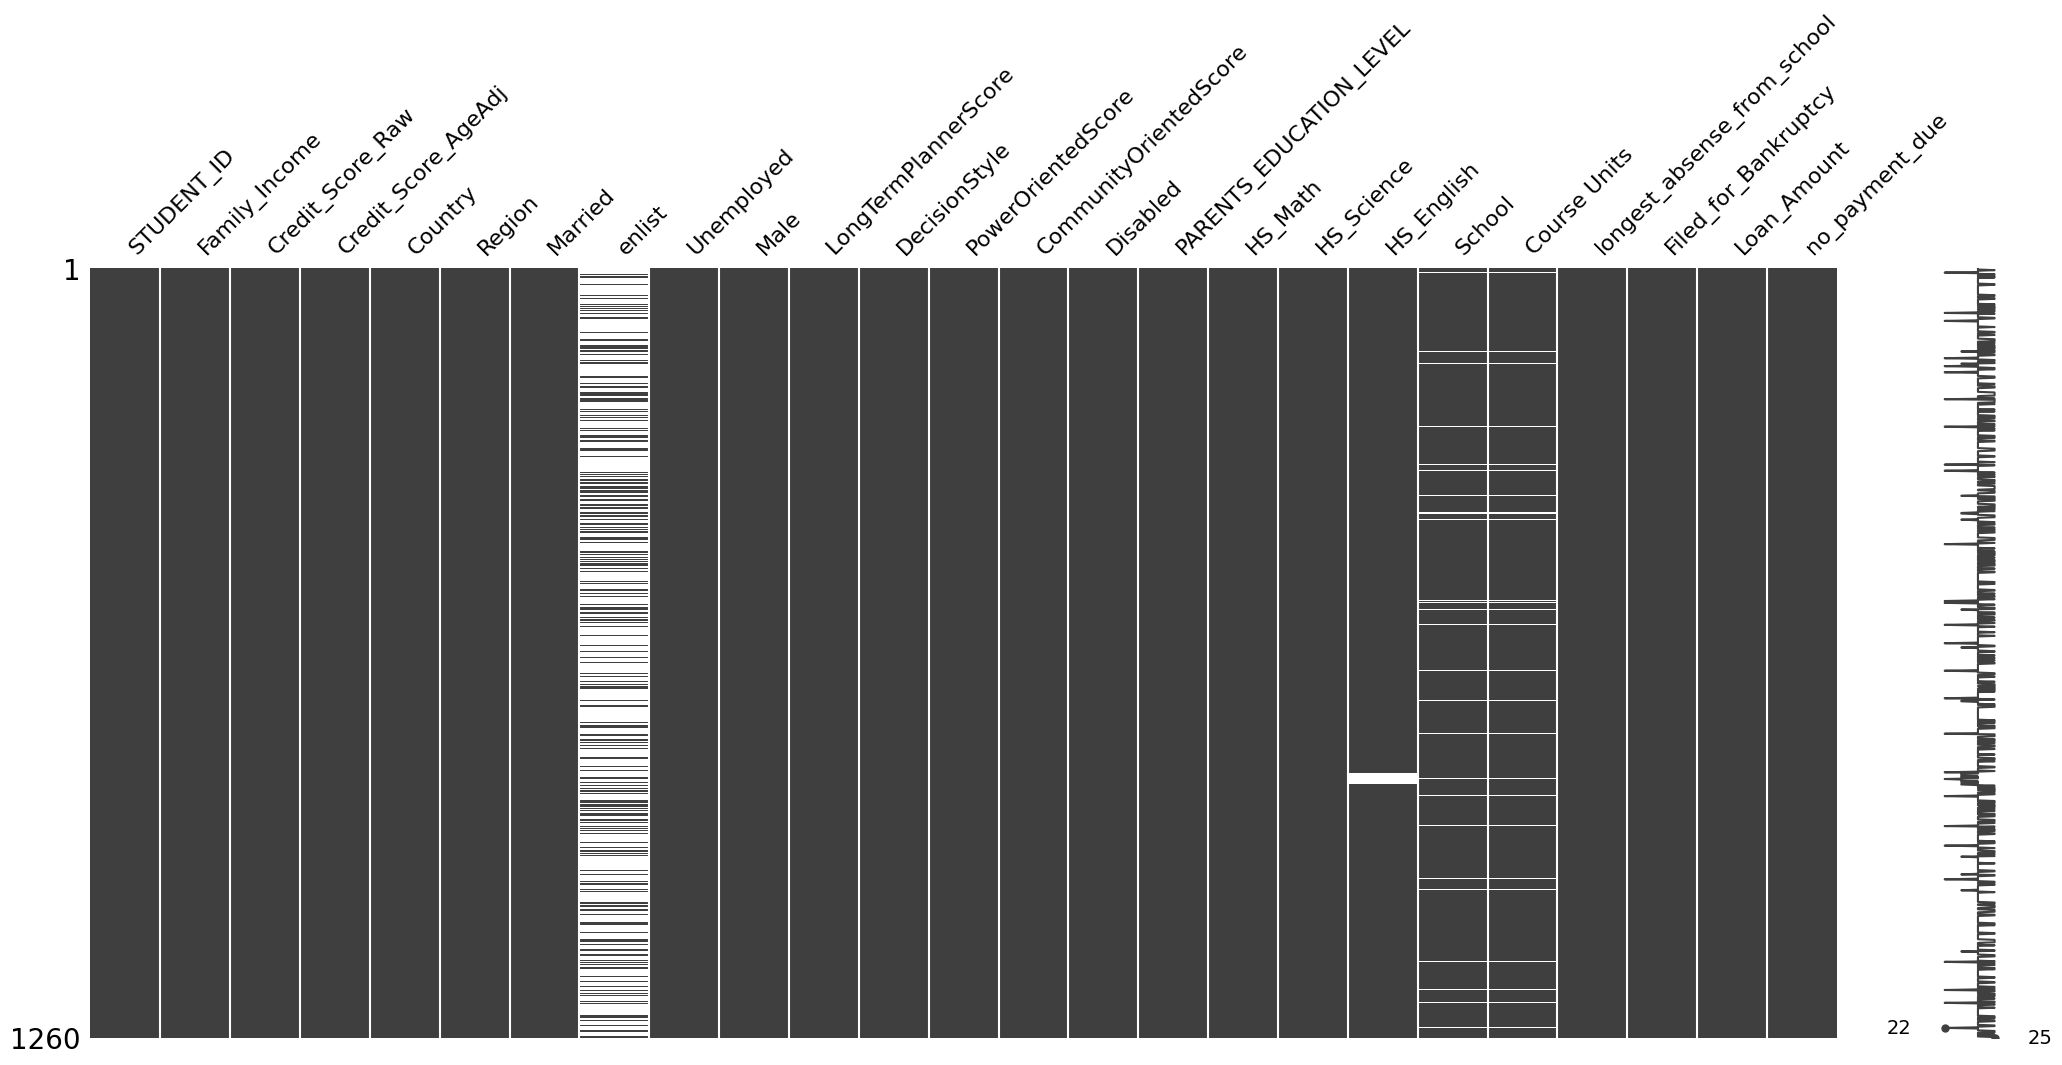

In [178]:
# missingno matrix visualization
import missingno as msno
%matplotlib inline
%config InLineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

<Axes: >

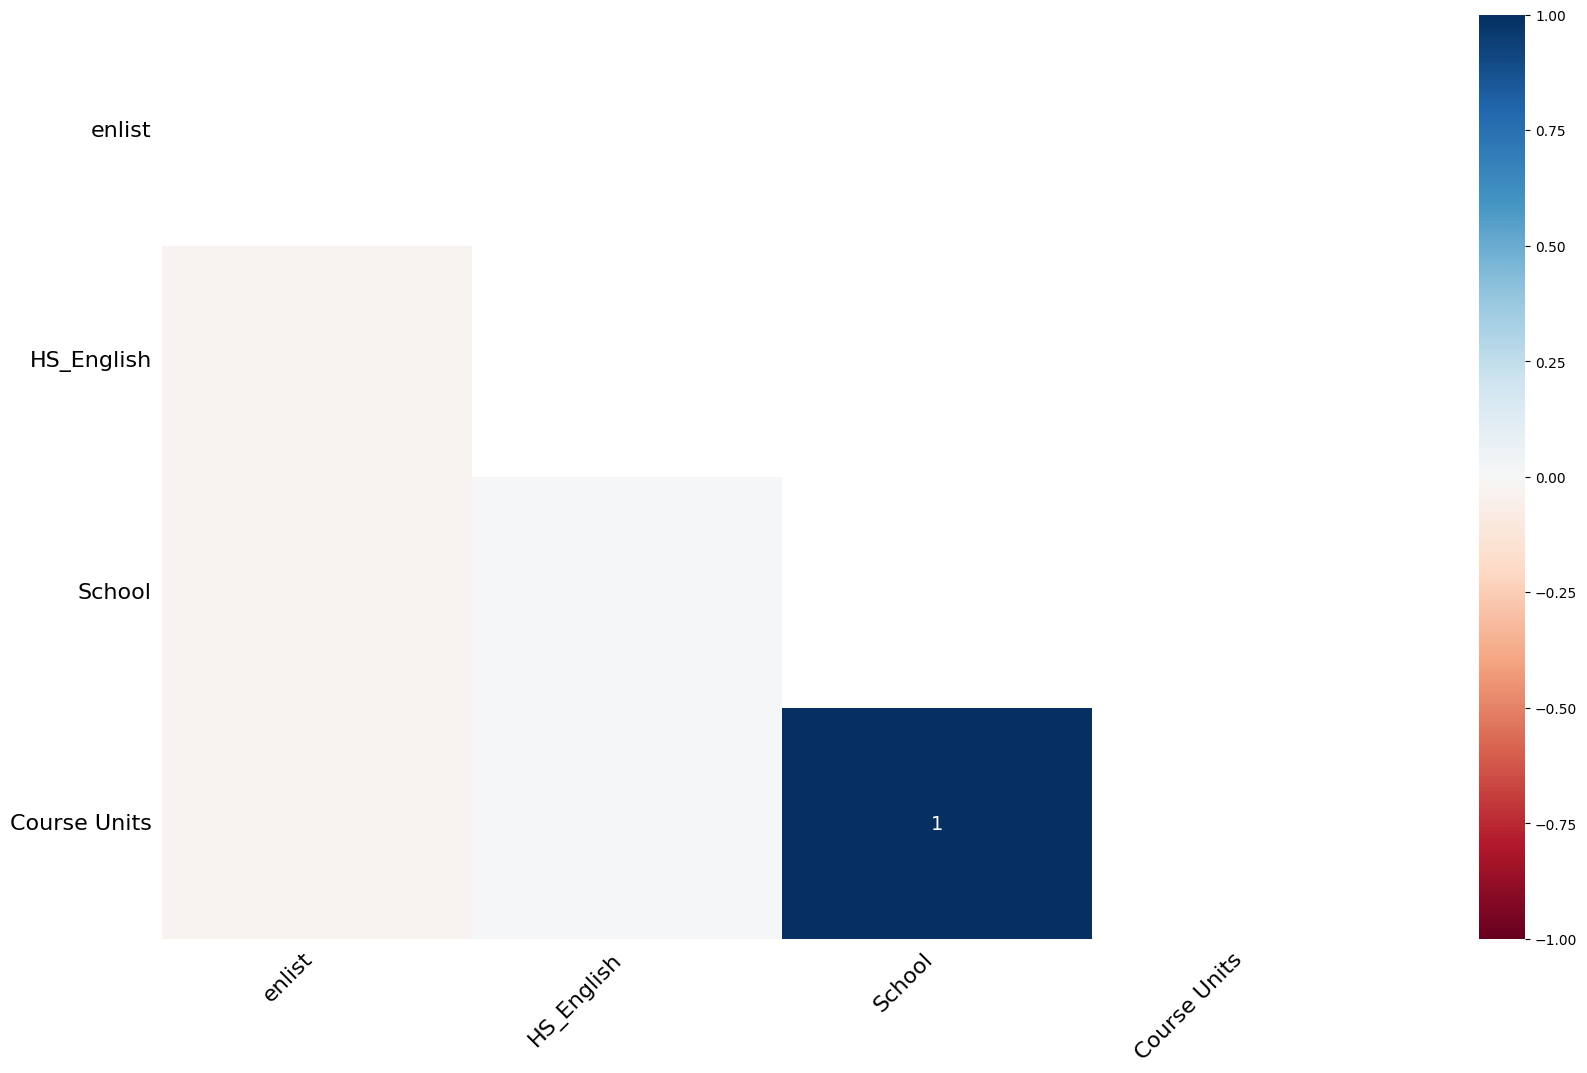

In [179]:
# missingno heatmap visualization to check for correlation of missingness between different columns
msno.heatmap(df)

### Data Understanding Functions

In [180]:
# Prepare to import custom functions
import sys
# append the function.py file file path to the system path
# function.py is uploaded to ./Functions folder
if './Functions' not in sys.path:
    sys.path.append('./Functions')

In [181]:
# Import custom functions
import function as fun

In [182]:
fun.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,STUDENT_ID,int64,0.00,1000,500.082540,291.320155,1.000000,245.750000,501.500000,754.250000,1000.000000
1,Family_Income,float64,0.00,1000,75502.520984,22844.324552,35074.290000,56019.192500,74882.970000,95389.937500,114967.960000
2,Credit_Score_Raw,float64,0.00,996,0.464567,0.231376,0.000735,0.279951,0.516725,0.626726,1.000000
3,Credit_Score_AgeAdj,float64,0.00,1000,0.553017,0.194809,0.045899,0.419019,0.565426,0.708184,0.985665
4,Country,object,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Region,int64,0.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Married,int64,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,enlist,object,70.63,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Unemployed,bool,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,bool,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Exploration

##### 'STUDENT_ID'

There are no outliers in STUDENT_ID.
----------------------Box plot----------------------


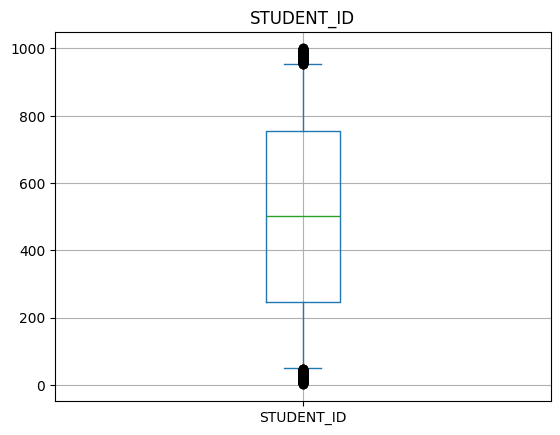

----------------------Distribution plot----------------------


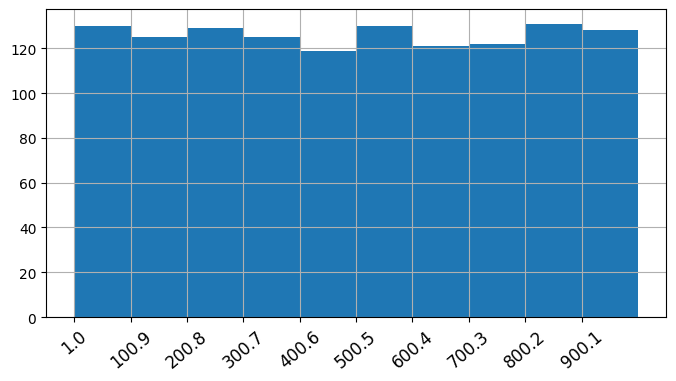

0    1
1    2
2    3
3    4
4    5
Name: STUDENT_ID, dtype: int64

In [183]:
fun.data_exploration(df, 'STUDENT_ID')
df['STUDENT_ID'].head()

##### 'Family_Income'

There are no outliers in Family_Income.
----------------------Box plot----------------------


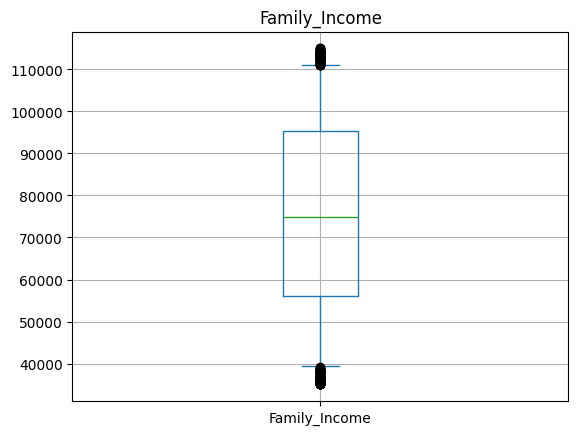

----------------------Distribution plot----------------------


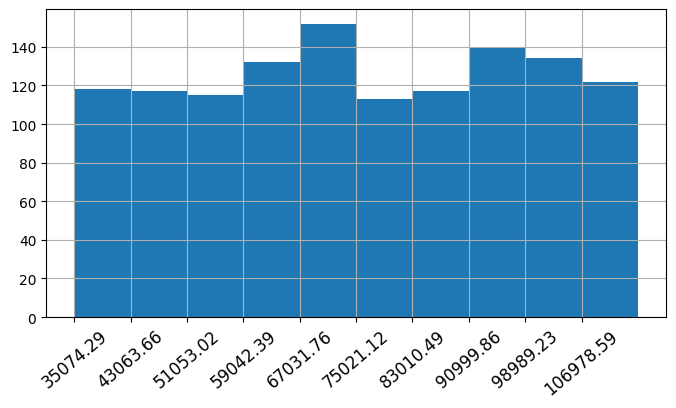

0    109770.95
1     58442.99
2     97125.87
3     55256.40
4     58187.16
Name: Family_Income, dtype: float64

In [184]:
fun.data_exploration(df, 'Family_Income')
df['Family_Income'].head()

##### 'Credit_Score_Raw'

There are no outliers in Credit_Score_Raw.
----------------------Box plot----------------------


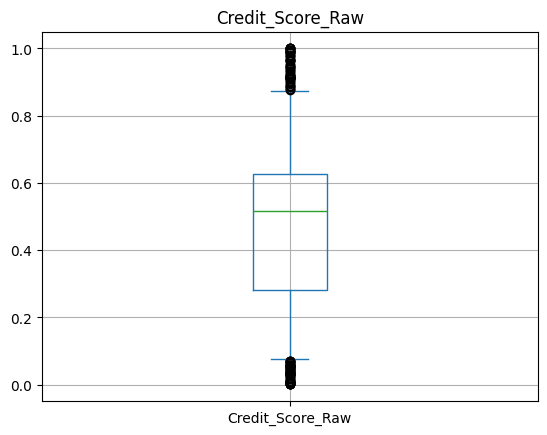

----------------------Distribution plot----------------------


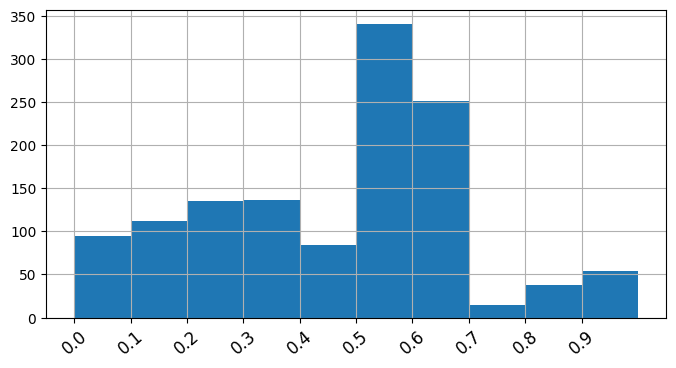

0    0.495227
1    0.987649
2    0.249315
3    0.653183
4    0.273099
Name: Credit_Score_Raw, dtype: float64

In [185]:
fun.data_exploration(df, 'Credit_Score_Raw')
df['Credit_Score_Raw'].head()

##### 'Credit_Score_AgeAdj'

There are no outliers in Credit_Score_AgeAdj.
----------------------Box plot----------------------


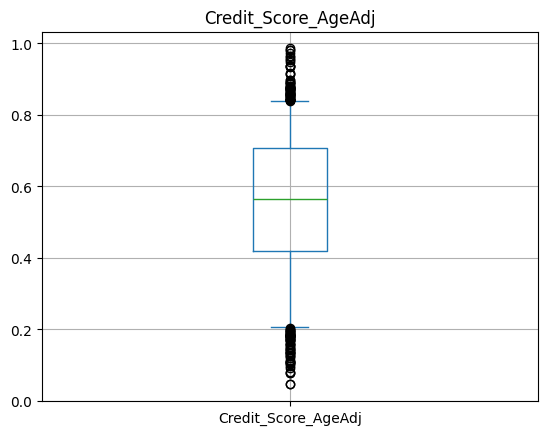

----------------------Distribution plot----------------------


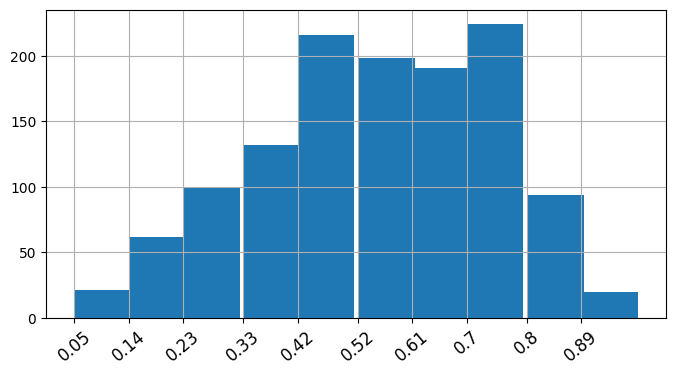

0    0.767967
1    0.529815
2    0.589539
3    0.805702
4    0.415433
Name: Credit_Score_AgeAdj, dtype: float64

In [186]:
fun.data_exploration(df, 'Credit_Score_AgeAdj')
df['Credit_Score_AgeAdj'].head()

##### 'Country'

  Country  counts  %count
0  Belize       2    0.16
1     USA    1258   99.84


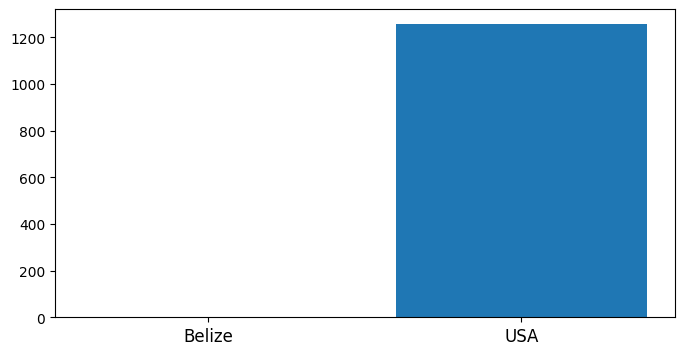

In [187]:
fun.data_exploration(df, 'Country')

##### 'Region'

There are no outliers in Region.
----------------------Box plot----------------------


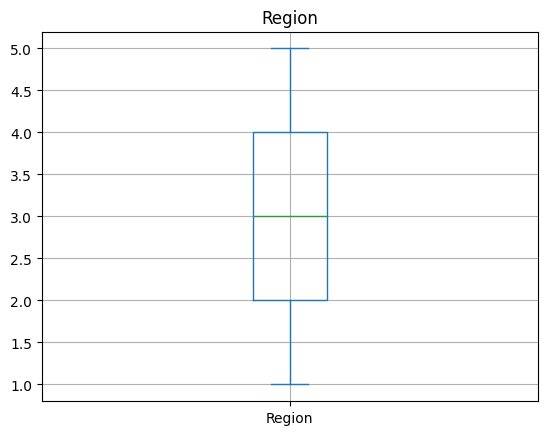

Region
5    262
2    259
3    253
4    247
1    239
Name: count, dtype: int64

In [188]:
fun.data_exploration(df, 'Region')
df['Region'].value_counts()

##### 'Married'

There are no outliers in Married.
----------------------Box plot----------------------


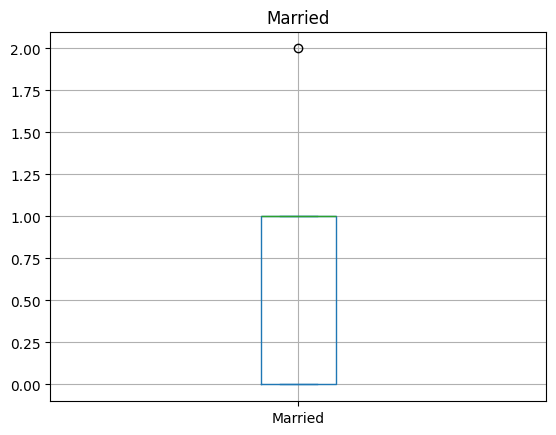

Married
1    677
0    582
2      1
Name: count, dtype: int64

In [189]:
fun.data_exploration(df, 'Married')
df['Married'].value_counts()

##### 'enlist'

            enlist  counts  %count
0        air_force      35    2.78
1             army      40    3.17
2  fire_department     136   10.79
3   foreign_legion      38    3.02
4          marines      36    2.86
5             navy      47    3.73
6      peace_corps      38    3.02


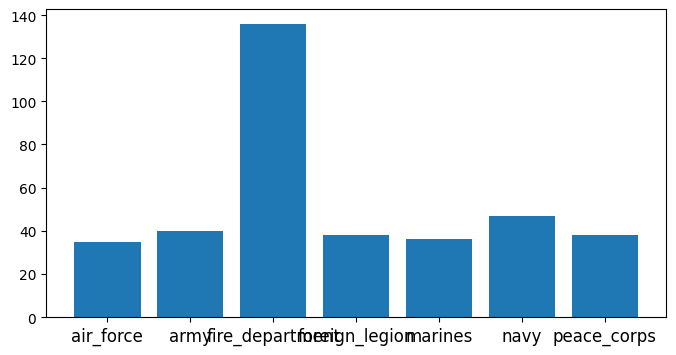

In [190]:
fun.data_exploration(df, 'enlist')

##### 'Unemployed'

There are no outliers in Unemployed.
----------------------Box plot----------------------


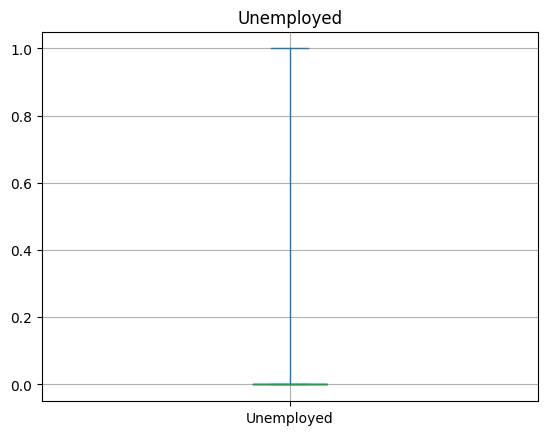

Unemployed
False    1130
True      130
Name: count, dtype: int64

In [191]:
fun.data_exploration(df, 'Unemployed')
df['Unemployed'].value_counts()

##### 'Male'

There are no outliers in Male.
----------------------Box plot----------------------


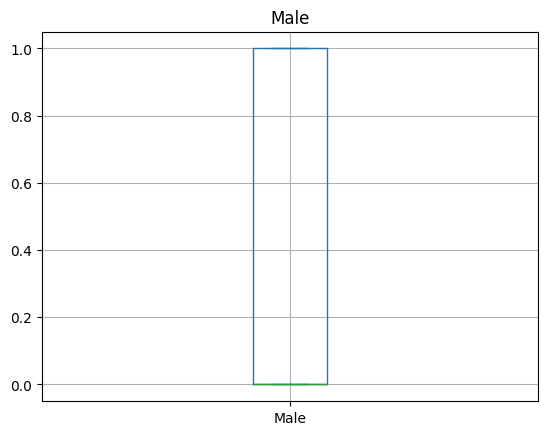

Male
False    636
True     624
Name: count, dtype: int64

In [192]:
fun.data_exploration(df, 'Male')
df['Male'].value_counts()

##### 'LongTermPlannerScore'

There are 8 outliers for LongTermPlannerScore .
[0.16686285232890508, 0.16686285232890508, 0.161963306774495, 0.09097842201845197, 0.09097842201845197, 0.12834460267822523, 0.17022491341254192, 0.17022491341254192]
----------------------Box plot----------------------


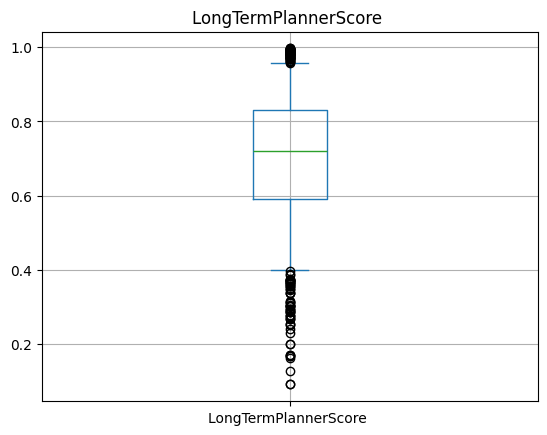

----------------------Distribution plot----------------------


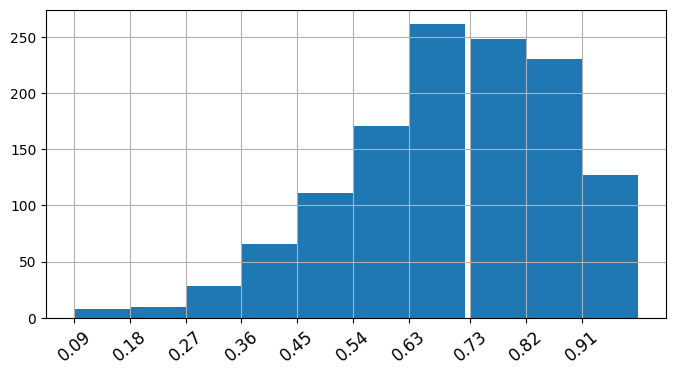

0    0.956004
1    0.601589
2    0.655254
3    0.841278
4    0.738851
Name: LongTermPlannerScore , dtype: float64

In [193]:
fun.data_exploration(df, 'LongTermPlannerScore ')
df['LongTermPlannerScore '].head()

##### 'DecisionStyle'

  DecisionStyle  counts  %count
0    Analytical     107    8.49
1     Emotional    1153   91.51


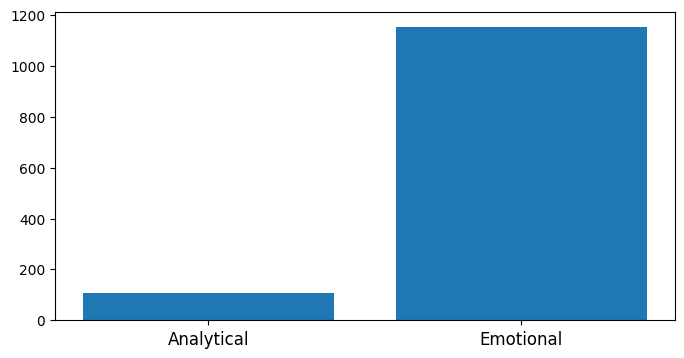

In [194]:
fun.data_exploration(df, 'DecisionStyle')

##### 'PowerOrientedScore'

There are no outliers in PowerOrientedScore.
----------------------Box plot----------------------


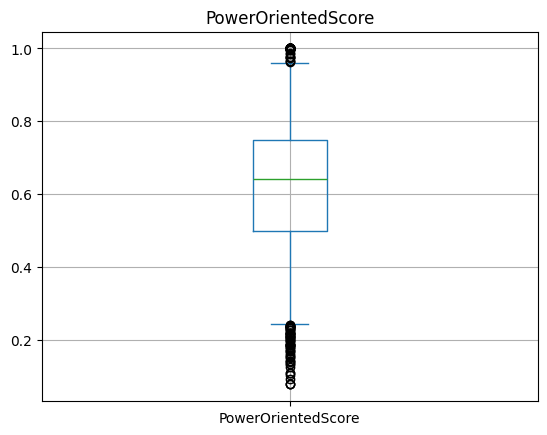

----------------------Distribution plot----------------------


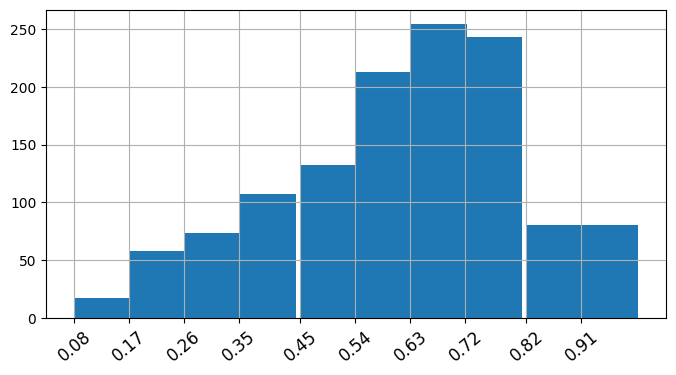

0    0.767967
1    1.000000
2    0.589539
3    0.805702
4    0.415433
Name: PowerOrientedScore, dtype: float64

In [195]:
fun.data_exploration(df, 'PowerOrientedScore')
df['PowerOrientedScore'].head()

##### 'CommunityOrientedScore'

There are no outliers in CommunityOrientedScore.
----------------------Box plot----------------------


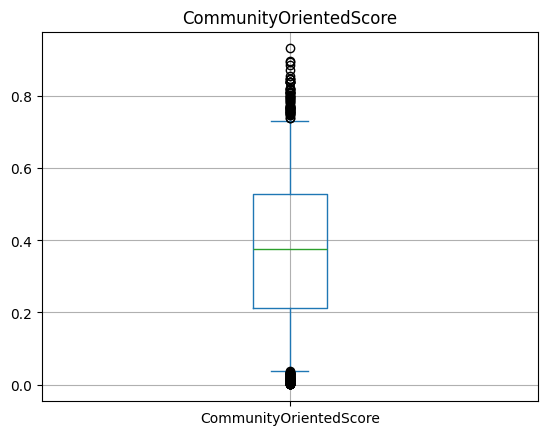

----------------------Distribution plot----------------------


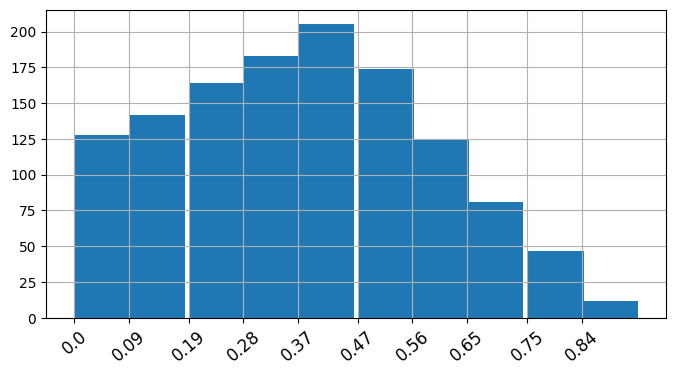

0    0.189491
1    0.529815
2    0.589539
3    0.061538
4    0.241257
Name: CommunityOrientedScore, dtype: float64

In [196]:
fun.data_exploration(df, 'CommunityOrientedScore')
df['CommunityOrientedScore'].head()

##### 'Disabled'

There are 120 outliers for Disabled.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


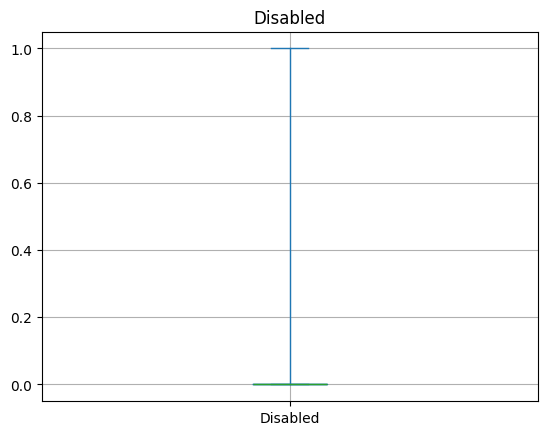

Disabled
False    1140
True      120
Name: count, dtype: int64

In [197]:
fun.data_exploration(df, 'Disabled')
df['Disabled'].value_counts()

##### 'PARENTS_EDUCATION_LEVEL'

  PARENTS_EDUCATION_LEVEL  counts  %count
0        VERY HS or Lower       1    0.08
1              Bachelor's     369   29.29
2               Doctorate     390   30.95
3                   GREAT       2    0.16
4             HS or Lower     361   28.65
5                Master's     134   10.63
6        VERY HS or Lower       3    0.24


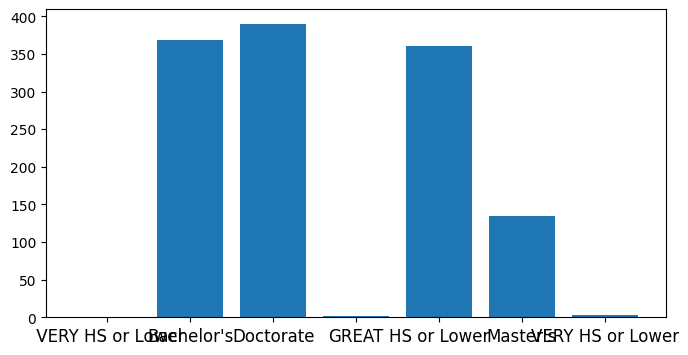

In [198]:
fun.data_exploration(df, 'PARENTS_EDUCATION_LEVEL')

##### 'HS_Math'

There are 9 outliers for HS_Math.
[3, 3, 2, 3, 3, 3, 2, 3, 2]
----------------------Box plot----------------------


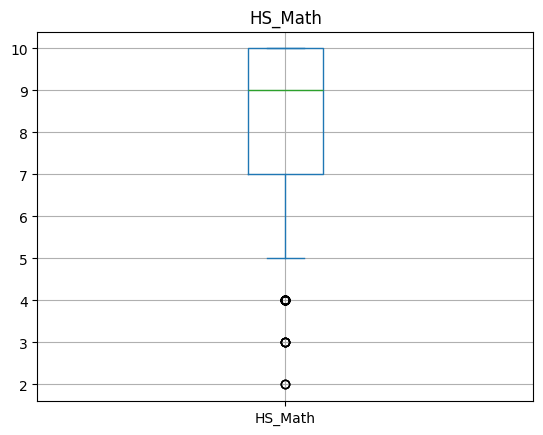

0    10
1     9
2     9
3    10
4     6
Name: HS_Math, dtype: int64

In [199]:
fun.data_exploration(df, 'HS_Math')
df['HS_Math'].head()

##### 'HS_Science'

There are 7 outliers for HS_Science.
[3, 3, 3, 3, 3, 3, 3]
----------------------Box plot----------------------


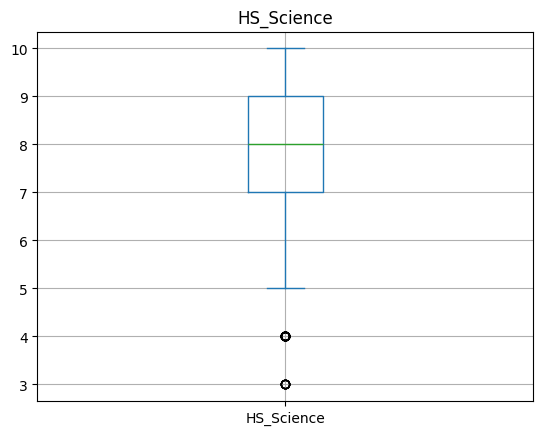

0    10
1     9
2     6
3     9
4     8
Name: HS_Science, dtype: int64

In [200]:
fun.data_exploration(df, 'HS_Science')
df['HS_Science'].head()

##### 'HS_English'

There are 6 outliers for HS_English.
[3.0, 3.0, 2.0, 3.0, 3.0, 3.0]
----------------------Box plot----------------------


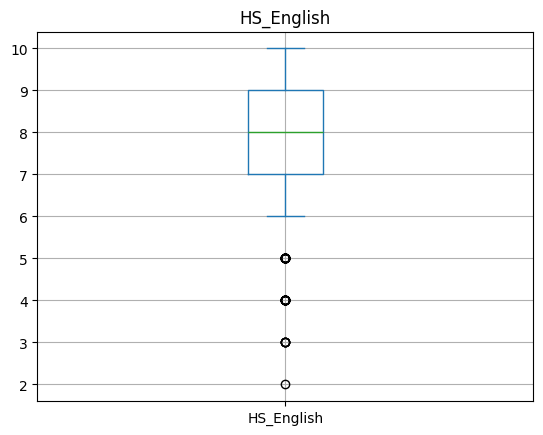

0    10.0
1    10.0
2     6.0
3     9.0
4     5.0
Name: HS_English, dtype: float64

In [201]:
fun.data_exploration(df, 'HS_English')
df['HS_English'].head()

In [202]:
df['HS_English'].value_counts()

HS_English
9.0     296
10.0    284
8.0     246
7.0     226
6.0     132
5.0      29
4.0      23
3.0       5
2.0       1
Name: count, dtype: int64

##### 'School'

  School  counts  %count
0    occ     251   19.92
1    smc     234   18.57
2    ucb      89    7.06
3    uci     236   18.73
4   ucla     239   18.97
5   ucsd     169   13.41


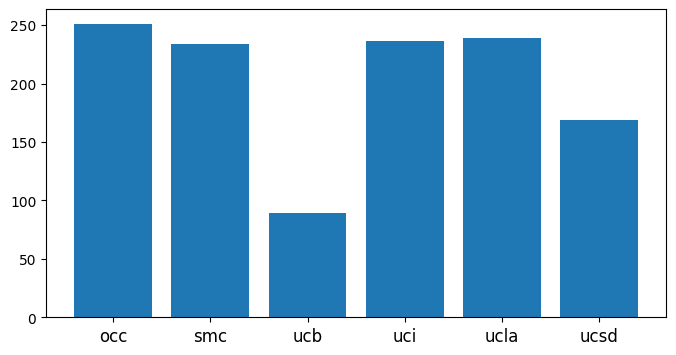

In [203]:
fun.data_exploration(df, 'School')

##### 'Course Units'

In [204]:
fun.data_exploration(df, 'Course Units')
df['Course Units'].value_counts()

Course Units has more than 10 unique values


Course Units
3     134
4     128
2     113
1     110
10    107
9      94
5      90
12     90
6      89
11     81
7      70
8      70
15     16
14     14
13     12
Name: count, dtype: int64

There are no outliers in Course Units.
----------------------Box plot----------------------


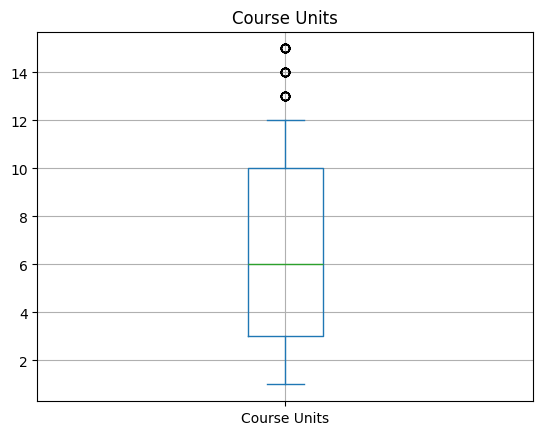

----------------------Distribution plot----------------------


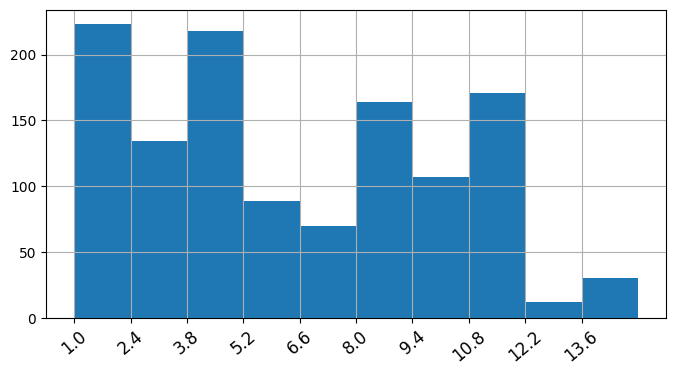

In [205]:
df['Course Units'] = df['Course Units'].astype('Int64')
fun.data_exploration(df, 'Course Units')

##### 'longest_absense_from_school'

In [206]:
fun.data_exploration(df, 'longest_absense_from_school')
df['longest_absense_from_school'].value_counts()

longest_absense_from_school has more than 10 unique values


longest_absense_from_school
4    154
5    139
0    134
3    129
6    125
7    122
1    117
8    117
2    116
9    107
Name: count, dtype: int64

There are no outliers in longest_absense_from_school.
----------------------Box plot----------------------


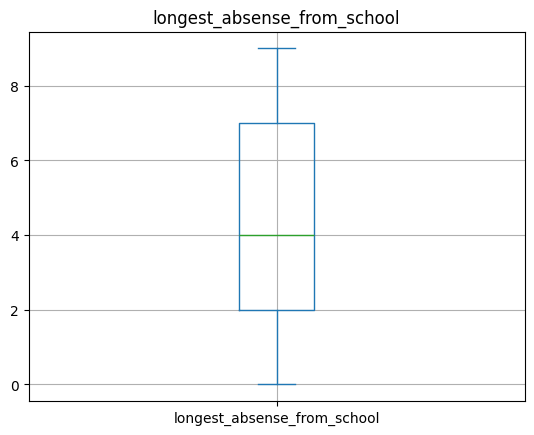

----------------------Distribution plot----------------------


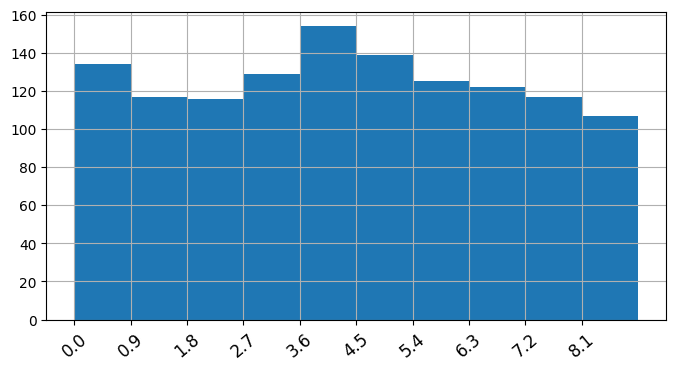

In [207]:
df['longest_absense_from_school'] = df['longest_absense_from_school'].astype('Int64')
fun.data_exploration(df, 'longest_absense_from_school')

##### 'Filed_for_Bankruptcy'

There are 120 outliers for Filed_for_Bankruptcy.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


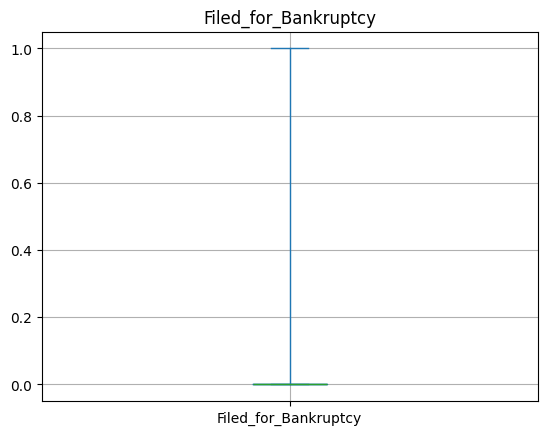

Filed_for_Bankruptcy
False    1140
True      120
Name: count, dtype: int64

In [208]:
fun.data_exploration(df, 'Filed_for_Bankruptcy')
df['Filed_for_Bankruptcy'].value_counts()

##### 'Loan_Amount'

There are 10 outliers for Loan_Amount.
[6277, 5847, 6306, 6620, 6281, 6053, 6053, 6323, 6178, 6178]
----------------------Box plot----------------------


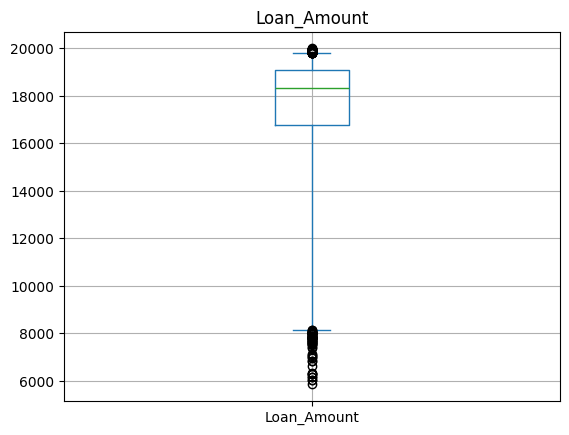

----------------------Distribution plot----------------------


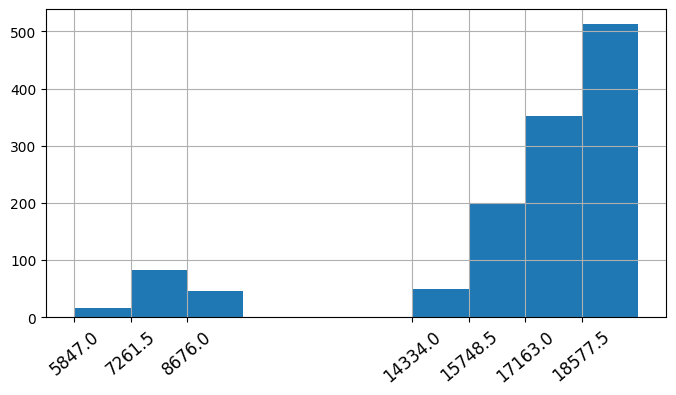

0    19861
1    17391
2     8118
3    18905
4    16175
Name: Loan_Amount, dtype: int64

In [209]:
fun.data_exploration(df, 'Loan_Amount')
df['Loan_Amount'].head()

##### 'no_payment_due'

  no_payment_due  counts  %count
0            neg     440   34.92
1            pos     820   65.08


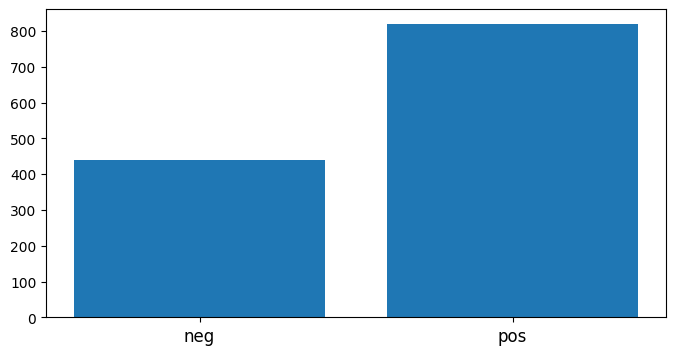

In [210]:
fun.data_exploration(df, 'no_payment_due')

## Data Preparation

In [ ]:
import seaborn as sns
%config InLineBackend.figure_format = 'svg'

df_correlation = df
df_columns = list(df.columns)
plt.figure(figsize=(12,6))
g = sns.heatmap(df_correlation[df_columns].corr(),
                annot=True,
                cmap = "coolwarm")

## Modeling

### Task A1

### Task A2

### Task A3

### Task A4

### Task A5